In [4]:
import folium
from folium import plugins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from collections import Counter

In [5]:
PATH_f = '../programs_theano_poi/poidata/Foursquare/sequence/Foursquare.txt'
# PATH_g = './poidata/Gowalla/sequence/Gowalla.txt'
pois = pd.read_csv(PATH_f, sep=' ')
# all_user_pois = [[i for i in upois.split('/')] for upois in pois['u_pois']]
all_user_cordi = [[tuple(map(float, i.split(','))) for i in upois.split('/')] for upois in pois['u_coordinates']]
all_cordi = [cordi for ucordi in all_user_cordi for cordi in ucordi]
all_cordi = np.asarray(all_cordi).astype('float32')
mean_lat = np.mean(all_cordi[:, 0])
mean_lon = np.mean(all_cordi[:, 1])
print(mean_lat, mean_lon)
colors = ['red', 'blue', 'black', 'green', 'yellow', 'cyan', 'magenta', 'ivory', 'darkblue', 'pink']

(1.3279412, 103.84396)


In [7]:
# <--- lambda --->
lmd_last = np.load('../Lmdd/Foursquare.txt_20_150_150last1.npy')  # user x lmdd_size = (2310, 377)
pd_lmd_last = pd.DataFrame(lmd_last)
kmeans_model = KMeans(n_clusters=10).fit(pd_lmd_last)
cluster_labels = kmeans_model.labels_

In [11]:
print('cluster: 9')
user = 1020
pd_lmd_last = pd.DataFrame(lmd_last[user, :30].T)
pd_lmd_last.plot()
plt.show()
cluster_map = folium.Map(location=[mean_lat, mean_lon])
# folium.TileLayer('openstreetmap').add_to(cluster_map)       # 背景地图彩色，颜色太重。
# https://deparkes.co.uk/2016/06/10/folium-map-tiles/       # 各种底色风格
folium.TileLayer('cartodbpositron').add_to(cluster_map)         # 淡色背景
points = all_user_cordi[user]
print len(points)
for each in points:
    folium.Marker(each).add_to(cluster_map)
# cluster_map.add_child(plugins.HeatMap(points[-70:], radius=20))
folium.PolyLine(points).add_to(cluster_map)
cluster_map.save('user1020_cluster9.html')
cluster_map

cluster: 4


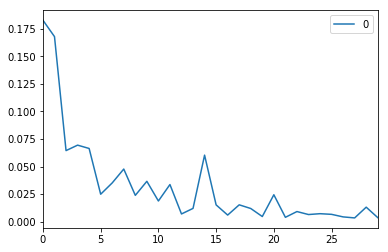

85


<iframe src="data:text/html;charset=utf-8;base64,PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgPHNjcmlwdD5MX1BSRUZFUl9DQU5WQVMgPSBmYWxzZTsgTF9OT19UT1VDSCA9IGZhbHNlOyBMX0RJU0FCTEVfM0QgPSBmYWxzZTs8L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2FqYXguZ29vZ2xlYXBpcy5jb20vYWpheC9saWJzL2pxdWVyeS8xLjExLjEvanF1ZXJ5Lm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvanMvYm9vdHN0cmFwLm1pbi5qcyI+PC9zY3JpcHQ+CiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvTGVhZmxldC5hd2Vzb21lLW1hcmtlcnMvMi4wLjIvbGVhZmxldC5hd2Vzb21lLW1hcmtlcnMuanMiPjwvc2NyaXB0PgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2Nkbi5qc2RlbGl2ci5uZXQvbnBtL2xlYWZsZXRAMS4yLjAvZGlzdC9sZWFmbGV0LmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLm1pbi5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9ib290c3RyYXAvMy4yLjAvY3NzL2Jvb3RzdHJhcC10aGVtZS5taW4uY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vZm9udC1hd2Vzb21lLzQuNi4zL2Nzcy9mb250LWF3ZXNvbWUubWluLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9yYXdnaXQuY29tL3B5dGhvbi12aXN1YWxpemF0aW9uL2ZvbGl1bS9tYXN0ZXIvZm9saXVtL3RlbXBsYXRlcy9sZWFmbGV0LmF3ZXNvbWUucm90YXRlLmNzcyIvPgogICAgPHN0eWxlPmh0bWwsIGJvZHkge3dpZHRoOiAxMDAlO2hlaWdodDogMTAwJTttYXJnaW46IDA7cGFkZGluZzogMDt9PC9zdHlsZT4KICAgIDxzdHlsZT4jbWFwIHtwb3NpdGlvbjphYnNvbHV0ZTt0b3A6MDtib3R0b206MDtyaWdodDowO2xlZnQ6MDt9PC9zdHlsZT4KICAgIAogICAgICAgICAgICA8c3R5bGU+ICNtYXBfZDUzOGY5YzUyMmZlNGI3ZWFhM2E3ODZlODg4YmEzN2YgewogICAgICAgICAgICAgICAgcG9zaXRpb24gOiByZWxhdGl2ZTsKICAgICAgICAgICAgICAgIHdpZHRoIDogMTAwLjAlOwogICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICBsZWZ0OiAwLjAlOwogICAgICAgICAgICAgICAgdG9wOiAwLjAlOwogICAgICAgICAgICAgICAgfQogICAgICAgICAgICA8L3N0eWxlPgogICAgICAgIAo8L2hlYWQ+Cjxib2R5PiAgICAKICAgIAogICAgICAgICAgICA8ZGl2IGNsYXNzPSJmb2xpdW0tbWFwIiBpZD0ibWFwX2Q1MzhmOWM1MjJmZTRiN2VhYTNhNzg2ZTg4OGJhMzdmIiA+PC9kaXY+CiAgICAgICAgCjwvYm9keT4KPHNjcmlwdD4gICAgCiAgICAKCiAgICAgICAgICAgIAogICAgICAgICAgICAgICAgdmFyIGJvdW5kcyA9IG51bGw7CiAgICAgICAgICAgIAoKICAgICAgICAgICAgdmFyIG1hcF9kNTM4ZjljNTIyZmU0YjdlYWEzYTc4NmU4ODhiYTM3ZiA9IEwubWFwKAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgJ21hcF9kNTM4ZjljNTIyZmU0YjdlYWEzYTc4NmU4ODhiYTM3ZicsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICB7Y2VudGVyOiBbMS4zMjc5NCwxMDMuODQ0XSwKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIHpvb206IDEwLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgbWF4Qm91bmRzOiBib3VuZHMsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBsYXllcnM6IFtdLAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgd29ybGRDb3B5SnVtcDogZmFsc2UsCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICBjcnM6IEwuQ1JTLkVQU0czODU3CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIH0pOwogICAgICAgICAgICAKICAgICAgICAKICAgIAogICAgICAgICAgICB2YXIgdGlsZV9sYXllcl9kODY4MTA5NTY3MzM0ZjU1YmVmNDgzYzA3ZDFhNDZkZiA9IEwudGlsZUxheWVyKAogICAgICAgICAgICAgICAgJ2h0dHBzOi8ve3N9LnRpbGUub3BlbnN0cmVldG1hcC5vcmcve3p9L3t4fS97eX0ucG5nJywKICAgICAgICAgICAgICAgIHsKICAiYXR0cmlidXRpb24iOiBudWxsLCAKICAiZGV0ZWN0UmV0aW5hIjogZmFsc2UsIAogICJtYXhab29tIjogMTgsIAogICJtaW5ab29tIjogMSwgCiAgIm5vV3JhcCI6IGZhbHNlLCAKICAic3ViZG9tYWlucyI6ICJhYmMiCn0KICAgICAgICAgICAgICAgICkuYWRkVG8obWFwX2Q1MzhmOWM1MjJmZTRiN2VhYTNhNzg2ZTg4OGJhMzdmKTsKICAgICAgICAKICAgIAogICAgICAgICAgICB2YXIgdGlsZV9sYXllcl8wMTY5YzI5Nzk4MTg0ZWE0ODQyMTcyNTczNmVkZDY1NSA9IEwudGlsZUxheWVyKAogICAgICAgICAgICAgICAgJ2h0dHBzOi8ve3N9LnRpbGUub3BlbnN0cmVldG1hcC5vcmcve3p9L3t4fS97eX0ucG5nJywKICAgICAgICAgICAgICAgIHsKICA

In [14]:
print('cluster: 4')
user = 738
pd_lmd_last = pd.DataFrame(lmd_last[user, :30].T)
pd_lmd_last.plot()
plt.show()
cluster_map = folium.Map(location=[mean_lat, mean_lon])
# folium.TileLayer('openstreetmap').add_to(cluster_map)       # 背景地图彩色，颜色太重。
# https://deparkes.co.uk/2016/06/10/folium-map-tiles/       # 各种底色风格
folium.TileLayer('cartodbpositron').add_to(cluster_map)         # 淡色背景
points = all_user_cordi[user]
print len(points)
for each in points[-60:]:
    folium.Marker(each).add_to(cluster_map)
# cluster_map.add_child(plugins.HeatMap(points[-70:], radius=20))
folium.PolyLine(points[-60:]).add_to(cluster_map)
cluster_map.save('user738_cluster4.html')
cluster_map

In [16]:
print('cluster: 3')
user = 758
pd_lmd_last = pd.DataFrame(lmd_last[user, :30].T)
pd_lmd_last.plot()
plt.show()
cluster_map = folium.Map(location=[mean_lat, mean_lon])
# folium.TileLayer('openstreetmap').add_to(cluster_map)       # 背景地图彩色，颜色太重。
# https://deparkes.co.uk/2016/06/10/folium-map-tiles/       # 各种底色风格
folium.TileLayer('cartodbpositron').add_to(cluster_map)         # 淡色背景
points = all_user_cordi[user]
print len(points)
for each in points[-60:]:
    folium.Marker(each).add_to(cluster_map)
# cluster_map.add_child(plugins.HeatMap(points[-70:], radius=20))
folium.PolyLine(points[-60:]).add_to(cluster_map)
cluster_map.save('user758_cluster3.html')
cluster_map